<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 200px; display: inline" alt="IMT"/> </a>
</center>

# [Ateliers: Technologies des grosses data](https://github.com/wikistat/Ateliers-Big-Data)

# [Reconnaissance d'Activité Humaine](https://github.com/wikistat/Ateliers-Big-Data/5-HumanActivityRecognition) ([HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)) en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>

## 1 Introduction
Les données sont issues de la communauté qui vise la reconnaissance d'activités humaines (*Human activity recognition, HAR*) à partir d’enregistrements, par exemple du gyroscope et de l'accéléromètre d'un smartphone, objet connecté précurseur et dont la fonctionnalité de téléphonie devient très secondaire.
Voir à ce propos l'[article](https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-11.pdf) relatant un colloque de 2013.  

Les données publiques disponibles et largement étudiées ont été acquises, décrites et analysées par [Anguita et al. (2013)]().
Elles sont accessibles sur le [dépôt](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) de l'University California Irvine (UCI) consacré à l'apprentissage machine.

L'archive contient les données brutes: accélérations en x, y, et z, chacun de 128 colonnes. D'autres fichiers en y soustrayant la gravité naturelle ainsi que les accélérations angulaires en x, y, et z soit en tout 9 fichiers. Mais 6 utiles avec 6*128=768 mesures.

Elle contient également deux fichiers "train" et "test" de "features" métier calculées dans les domaines temporels et fréquentiels: 561 variables.

Les données sont labellisées avec 6 activités: assis, couché, marche, monter ou descendre un escalier. Il s'agit donc, en première lecture, d'un problème de classification supervisée avec 10299 observations (apprentissage  et trest) décrites par 561 variables.

### 1.1 Objectifs

Ce premier calepin vise à l'étude: exploration et modélisation des 561 variables métier. Quelle méthode ou algorihtme d'apprentissage permet de déterminer au mieux l'activité humaine? 

Un deuxième calepin s'intéresse aux données brutes; Est-il possible d'économiser le travail préliminaire de définition des ariables métier en utilisant par exempel e sressources d'un algorihtme d'apprentissage profond. 

### 1.2 Lecture des données d'apprentissage et de test

In [1]:
# Graphiques dans la fenêtre
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

Les données peuvent être préalablement téléchargées ou directement lues. Ce sont celles originales du dépôt de l'[UCI](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). 

In [3]:
# Lecture des données d'apprentissage
Xtrain=pd.read_csv("X_train.txt",header=None)
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
# Extraction puis suppression de la dernière colonne des labels
Ltrain=Dtrain.iloc[:,784]
Dtrain.drop(Dtrain.columns[[784]], axis=1,inplace=True)
Dtrain.head()

(60000, 785)

In [5]:
# Dimensions de l'échantillon
Dtrain.shape

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Même chose pour les données de test
Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
Ltest=Dtest.iloc[:,784]
Dtest.drop(Dtest.columns[[784]], axis=1,inplace=True)
Dtest.shape

(10000, 784)

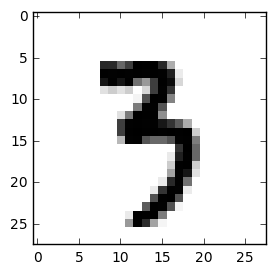

In [7]:
# affichage d'un chiffre
plt.figure(1, figsize=(3, 3))
plt.imshow(np.matrix(Dtest.iloc[1,:]).reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### 1.3 Exploration

Les données ont déjà été normalisées centrées et sont complètes. Elles ne nécessitent pas d'autre "nettoyage" au moins rudimentaire.

Le [tutoriel](http://wikistat.fr/pdf/st-tutor3-python-scikit.pdf) d'introduction à Scikit-learn montre comment représenter les images des caractères ainsi qu'une ACP qui n'est pas reprise ici. Quelles sont néanmoins les performances de k-means sur un tel volume ?

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
tps1 = time.clock()
km=KMeans(n_clusters=10,init='k-means++', 
   n_init=10, max_iter=100, tol=0.01,
   precompute_distances=True, verbose=0, 
   random_state=None, copy_x=True, n_jobs=1)
km.fit(Dtrain)
tps2 = time.clock()
print("Temps execution Kmeans :", (tps2 - tps1)/60)

('Temps execution Kmeans :', 3.4580030500000003)


In [9]:
cm = confusion_matrix(Ltrain, km.labels_)
print(cm)

[[ 162   14   17    3 2505  186   21  183   38 2794]
 [   5    9    9 3717    0   10 2977    9    6    0]
 [ 331   69 4197  360   98  156  351  211  175   10]
 [3922   49  215  424  120 1049  103   58  176   15]
 [   1 1939   39  159   10   19  309  165 3191   10]
 [1770  352   15  161  244 1525  792  122  376   64]
 [  28    1   87  270  119   96  221 4914   82  100]
 [   5 3773   39  326   14   10  282    4 1797   15]
 [1140  188   55  297   31 3448  413   47  194   38]
 [  86 2461   13  239   19   68  114    8 2904   37]]


Résultat sans grand intérêt mais qui montre la difficulté de regouper les caractères identiques à l'aide de la distance euclidienne usuelle; il y a beaucoup de confusion entre les classes.

## 2 Apprentissage et prévision du test

### 2.1 $K$ plus proches voisins

In [10]:
# Définition du modèle avec un nombre k "standard" de voisins
from sklearn.neighbors import KNeighborsClassifier
tps1 = time.clock()
knn = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
digit_knn=knn.fit(Dtrain, Ltrain) 
tps2 = time.clock()
print("Temps de k-nn :",(tps2 - tps1)/60)

('Temps de k-nn :', 0.48633329999999975)


In [11]:
# Apprentissage et estimation de l'erreur de prévision sur l'échantillon test
tps1 = time.clock()
erreur=1-digit_knn.score(Dtest,Ltest)
tps2 = time.clock()
print("Temps:",(tps2 - tps1)/60,"Erreur:",erreur)

('Temps:', 16.912439183333333, 'Erreur:', 0.033499999999999974)


Il faudrait ré-appliquer la procédure d'otpimisation de $k$ par validation croisée décrite dans le [tutoriel](http://wikistat.fr/pdf/st-tutor3-python-scikit.pdf) d'introduction à scikit-learn. Néanmoins la solution $k=10$ est raisonnable et on retrouve une performance classique sur ce type de données: 3.3%, pour une méthode utilisée sans raffinement. 

C'est en effet une autre distance qu'il faudrait utiliser avec les $k$ plus proches voisins pour améliorer sensiblement les résultats mais avec un coût beaucoup plus élevé en temps de calcul. Un autre [scénario](http://wikistat.fr/pdf/st-atelier-MINST-tangent-ditance.pdf) propose ainsi le calcul d'une distance tangentielle entre les images ([Simard et al. (1998)](https://hal-ens.archives-ouvertes.fr/file/index/docid/60948/filename/Tangent_distance.pdf)). Le programme Matlab fait appel à un programme en C. L'intégration dans du code python plutôt que Matlab resterait à faire...

### 2.2  Random forest

Les forêts aléatoires sont également une approche raisonnable, à moindre coût de développement, sur ces données. Analyser en détail la liste des paramètres proposés dans l'implémentation de cet algorithme. Consulter pour ce faire la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) en ligne.

Les valeurs par défaut des paramètres sont utilisées sauf pour le nombre d'arbres: 100 au lieu de 10, et le nombre de processeurs utilisés: -1 au lieu de 1 (tous sont utilisés sauf 1 pour le système). Attention, tous les paramètres disponibles ne sont pas listés.

In [12]:
from sklearn.ensemble import RandomForestClassifier
tps0 = time.clock()
rf = RandomForestClassifier(n_estimators=100, 
   criterion='gini', max_depth=None, min_samples_split=2, 
   min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
   bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
rf.fit(Dtrain,Ltrain)
tps1 = time.clock()
print("Temps de configutration RF :" ,tps1 - tps0)

('Temps de configutration RF :', 64.82319400000006)


In [13]:
# erreur out-of-bag
erreur_oob=1-rf.oob_score_
tps2 = time.clock()
print("Temps execution RF :", tps2 - tps0, "Erreur oob:", erreur_oob)


('Temps execution RF :', 64.82778100000019, 'Erreur oob:', 0.034950000000000037)


In [14]:
# erreur sur l'échantillon test
1-rf.score(Dtest,Ltest)

0.030399999999999983

In [15]:
cm = confusion_matrix(Ltest, rf.predict(Dtest))
print(cm)

[[ 971    0    0    1    0    3    1    1    3    0]
 [   0 1122    2    4    1    2    2    1    1    0]
 [   6    0  998    7    2    0    4    8    7    0]
 [   0    0   12  973    0    5    0    9    8    3]
 [   1    0    2    0  956    0    4    0    3   16]
 [   2    0    0   10    3  863    7    1    4    2]
 [   7    3    2    0    5    6  932    0    3    0]
 [   1    4   22    2    2    0    0  985    2   10]
 [   4    0    6    4    4    4    2    5  937    8]
 [   7    5    3   10   10    5    1    4    5  959]]


Comme pour les $k$ plus proches voisins, il serait utile d'optimiser certains paramètres dont le nombre d'arbres et sans doute *max_features*. L'optimisation de l'erreur *out-of-bag* plutôt qu'une procédure lourde  de validaiton croisée serait bienvenue. D'autre part, la restriction de la profondeur max des arbres pourrait réduire sensiblement les temps de calcul mais cela ne semble pas nécessaire d'autant que c'est un paramètre critique pour la qualité de la prévision.


## 3 Effet de la taille l'échantillon d'apprentissage

Le taux d'erreur de 3% obtenu sans effort d'optimisation est tout à fait correct au regard du temps passé en développement ! Plutôt que de chercher à l'optimiser, la suite du travail s'intéresse à l'effet de la taille de cet échantillon d'apprentissage sur la précision. La fonction [*learning_curve*](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html#sklearn.learning_curve) réalise ce calcul mais ne permet pas d'extraire le temps d'excution pour chaque taille. Une procédure rudimentaire est mise en oeuvre.

### 3.1 Avec Random Forest (Scikit-learn) et 100 arbres

In [16]:
from sklearn.cross_validation  import train_test_split
# tailles croissantes de l'échantillon d'apprentissage
arrayErreur=np.empty((12,3))
nArbres=100
for i in range(1,13):
    n=5000*i
    arrayErreur[i-1,0]=n
    if i==12:
        n=59999
    Xtrain,Xdrop,ytrain,ydrop=train_test_split(Dtrain,Ltrain,train_size=n)
    tps1 = time.clock()
    rf = RandomForestClassifier(n_estimators=nArbres, 
       criterion='gini', max_depth=None, min_samples_split=2, 
       min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
       bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
    rf.fit(Xtrain,ytrain)
    tps2=time.clock()
    arrayErreur[i-1,2]=1-rf.score(Dtest,Ltest)
    arrayErreur[i-1,1]=tps2 - tps1
dataframeErreur1=pd.DataFrame(arrayErreur,columns=["Taille","Temps","Erreur"])
print(dataframeErreur1)

     Taille      Temps  Erreur
0    5000.0   3.457624  0.0575
1   10000.0   7.290152  0.0491
2   15000.0  11.426457  0.0447
3   20000.0  16.040022  0.0409
4   25000.0  21.183110  0.0362
5   30000.0  26.583215  0.0370
6   35000.0  32.347471  0.0351
7   40000.0  38.161556  0.0345
8   45000.0  44.338295  0.0325
9   50000.0  50.560003  0.0310
10  55000.0  57.512892  0.0323
11  60000.0  66.378964  0.0286


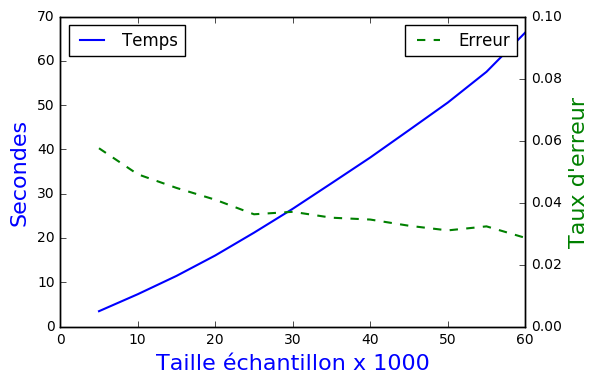

In [17]:
# Graphes superposés
from __future__ import division
from scipy import *
from pylab import *

x = linspace(5,60,12)     
fig = plt.figure()
# premier graphe
ax1 = fig.add_subplot(111)
ax1.plot(x,dataframeErreur1["Temps"] , '-b', label=ur"Temps",lw=1.5)
# absisses communes
xlim(0,65)
xlabel(ur"Taille échantillon x 1000", color='b', fontsize=16)
ylim(0, 70)                                                   
ylabel(ur"Secondes", color='b', fontsize=16)  
legend(loc=2)                                                  
# 2ème graphe
ax2 = ax1.twinx()                                              
ax2.plot(x,dataframeErreur1["Erreur"] ,'--g', label=ur"Erreur",lw=1.5)       
ylim(0, 0.1)                                                  
ylabel(ur"Taux d'erreur", color='g', fontsize=16)          
legend(loc=1)                                                   
show()

### 3.2 Avec Random Forest (Scikit-learn) et 250 arbres

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation  import train_test_split
# tailles croissantes de l'échantillon d'apprentissage
arrayErreur=np.empty((12,3))
nArbres=250
for i in range(1,13):
    n=5000*i
    arrayErreur[i-1,0]=n
    if i==12:
        n=59999
    Xtrain,Xdrop,ytrain,ydrop=train_test_split(Dtrain,Ltrain,train_size=n)
    tps1 = time.clock()
    rf = RandomForestClassifier(n_estimators=nArbres, 
       criterion='gini', max_depth=None, min_samples_split=2, 
       min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
       bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
    rf.fit(Xtrain,ytrain)
    tps2=time.clock()
    arrayErreur[i-1,2]=1-rf.score(Dtest,Ltest)
    arrayErreur[i-1,1]=tps2 - tps1
dataframeErreur=pd.DataFrame(arrayErreur,columns=["Taille","Temps","Erreur"])
print(dataframeErreur)

     Taille       Temps  Erreur
0    5000.0    8.583987  0.0581
1   10000.0   18.229656  0.0467
2   15000.0   28.941170  0.0397
3   20000.0   40.411522  0.0376
4   25000.0   54.190253  0.0350
5   30000.0   66.379693  0.0345
6   35000.0   81.504400  0.0327
7   40000.0   95.597676  0.0335
8   45000.0  111.185028  0.0310
9   50000.0  127.108396  0.0316
10  55000.0  144.049107  0.0290
11  60000.0  166.190830  0.0291


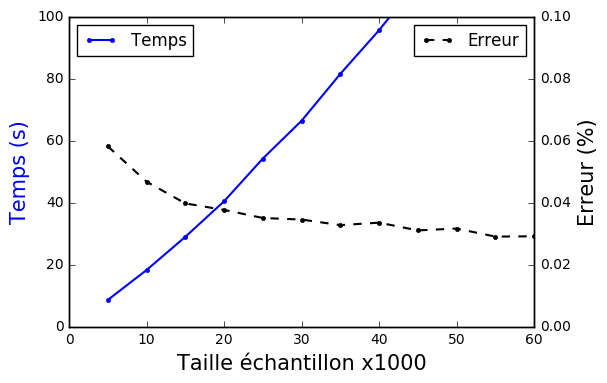

In [19]:
# Graphes supersosés
from __future__ import division
from scipy import *
from pylab import *

x = linspace(5,60,12)     
fig = plt.figure()
# premier graphe
ax1 = fig.add_subplot(111)
ax1.plot(x,dataframeErreur["Temps"] , '-b', label=ur"Temps",lw=1.5,marker=".",markersize=6)
# absisses communes
xlim(0,65)
xlabel(ur"Taille échantillon x1000", fontsize=15)
ylim(0, 100)                                                   
ylabel(ur"Temps (s)", color='b', fontsize=15)  
legend(loc=2)                                                  
# 2ème graphe
ax2 = ax1.twinx()                                              
ax2.plot(x,dataframeErreur["Erreur"] ,'--',color='black', label=ur"Erreur",lw=1.5,marker=".",markersize=6)       
ylim(0, 0.1)                                                  
ylabel(ur"Erreur (%)",  fontsize=15)          
legend(loc=1)                                                   
show()

Comparer les résultats obtenus (temps, précision) avec R.